In [40]:
import nltk

In [41]:
string = '''
At Waterloo we were fortunate in catching a train for Leatherhead, where we hired a trap at the station inn and drove for four or five miles through the lovely Surrey lanes. 
It was a perfect day, with a bright sun and a few fleecy clouds in the heavens. 
The trees and wayside hedges were just throwing out their first green shoots, and the air was full of the pleasant smell of the moist earth. To me at least there was a strange contrast between the sweet promise of the spring and this sinister quest upon which we were engaged. 
My companion sat in the front of the trap, his arms folded, his hat pulled down over his eyes, and his chin sunk upon his breast, buried in the deepest thought. 
Suddenly, however, he started, tapped me on the shoulder, and pointed over the meadows.
'''

In [42]:
len(string)

785

In [43]:
tokens = nltk.tokenize.word_tokenize(string)
print(tokens)

['At', 'Waterloo', 'we', 'were', 'fortunate', 'in', 'catching', 'a', 'train', 'for', 'Leatherhead', ',', 'where', 'we', 'hired', 'a', 'trap', 'at', 'the', 'station', 'inn', 'and', 'drove', 'for', 'four', 'or', 'five', 'miles', 'through', 'the', 'lovely', 'Surrey', 'lanes', '.', 'It', 'was', 'a', 'perfect', 'day', ',', 'with', 'a', 'bright', 'sun', 'and', 'a', 'few', 'fleecy', 'clouds', 'in', 'the', 'heavens', '.', 'The', 'trees', 'and', 'wayside', 'hedges', 'were', 'just', 'throwing', 'out', 'their', 'first', 'green', 'shoots', ',', 'and', 'the', 'air', 'was', 'full', 'of', 'the', 'pleasant', 'smell', 'of', 'the', 'moist', 'earth', '.', 'To', 'me', 'at', 'least', 'there', 'was', 'a', 'strange', 'contrast', 'between', 'the', 'sweet', 'promise', 'of', 'the', 'spring', 'and', 'this', 'sinister', 'quest', 'upon', 'which', 'we', 'were', 'engaged', '.', 'My', 'companion', 'sat', 'in', 'the', 'front', 'of', 'the', 'trap', ',', 'his', 'arms', 'folded', ',', 'his', 'hat', 'pulled', 'down', 'ove

In [44]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [45]:
from nltk.corpus import RegexpTokenizer as regextoken
tokenizer = regextoken(r'\w+')
tokens = tokenizer.tokenize(string)
print(tokens[:20])

['At', 'Waterloo', 'we', 'were', 'fortunate', 'in', 'catching', 'a', 'train', 'for', 'Leatherhead', 'where', 'we', 'hired', 'a', 'trap', 'at', 'the', 'station', 'inn']


In [46]:
x=''' In the year 1983 and in 2011, India world the cricket world cup'''
#In which year India won the world cup
t=regextoken(r'\d+')
t1 = t.tokenize(x)
print(t1)

['1983', '2011']


In [47]:
tokens = [token.lower() for token in tokens]

In [48]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tokens = [token for token in tokens if token not in stop]
print(tokens[:20])

['waterloo', 'fortunate', 'catching', 'train', 'leatherhead', 'hired', 'trap', 'station', 'inn', 'drove', 'four', 'five', 'miles', 'lovely', 'surrey', 'lanes', 'perfect', 'day', 'bright', 'sun']


In [16]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()
tokens = [lmtzr.lemmatize(token) for token in tokens]
print(tokens[:20])

['waterloo', 'fortunate', 'catching', 'train', 'leatherhead', 'hired', 'trap', 'station', 'inn', 'drove', 'four', 'five', 'mile', 'lovely', 'surrey', 'lane', 'perfect', 'day', 'bright', 'sun']


In [18]:
len(tokens)

69

In [13]:
print(WordNetLemmatizer().lemmatize('computer'))
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
porter=PorterStemmer()
snowball=SnowballStemmer('english')
print(porter.stem('computer'))
print(snowball.stem('computer'))

computer
comput
comput


In [25]:
tmp = 0
for ngram in nltk.ngrams(tokens, 2):
    print (ngram,)
    tmp += 1
#     print '\n'
# print '\n'
# print len(tokens)
print(tmp)


('waterloo',)
('fortunate',)
('catching',)
('train',)
('leatherhead',)
('hired',)
('trap',)
('station',)
('inn',)
('drove',)
('four',)
('five',)
('mile',)
('lovely',)
('surrey',)
('lane',)
('perfect',)
('day',)
('bright',)
('sun',)
('fleecy',)
('cloud',)
('heaven',)
('tree',)
('wayside',)
('hedge',)
('throwing',)
('first',)
('green',)
('shoot',)
('air',)
('full',)
('pleasant',)
('smell',)
('moist',)
('earth',)
('least',)
('strange',)
('contrast',)
('sweet',)
('promise',)
('spring',)
('sinister',)
('quest',)
('upon',)
('engaged',)
('companion',)
('sat',)
('front',)
('trap',)
('arm',)
('folded',)
('hat',)
('pulled',)
('eye',)
('chin',)
('sunk',)
('upon',)
('breast',)
('buried',)
('deepest',)
('thought',)
('suddenly',)
('however',)
('started',)
('tapped',)
('shoulder',)
('pointed',)
('meadow',)
69


In [27]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER
for ngram in nltk.ngrams(tokens, 1):
    ngram_freq[ngram] += 1

In [28]:
ngram_freq.most_common(10)

[(('trap',), 2),
 (('upon',), 2),
 (('waterloo',), 1),
 (('fortunate',), 1),
 (('catching',), 1),
 (('train',), 1),
 (('leatherhead',), 1),
 (('hired',), 1),
 (('station',), 1),
 (('inn',), 1)]

Let's combine all the above functions into a single function

In [31]:
def process_text(text):
    sentences = nltk.tokenize.sent_tokenize(text)
    sentence_tokens = [tokenizer.tokenize(sentence) for sentence in sentences]
    tokens = []
    for sentence in sentence_tokens:
        sent = []
        for word in sentence:
            if word.lower() not in stop:
                sent.append(word.lower())
        tokens.append(sent)
    ##THE SAME FOR LOOP CAN BE WRITTEN AS FOLLOWS
    ##tokens = [[word.lower() for word in sent if word not in stop] for sent in sentence_tokens]
    tokens = [[lmtzr.lemmatize(word) for word in sent] for sent in tokens]
    return tokens

In [32]:
sentence_tokens = process_text(string)
print(sentence_tokens)

[['waterloo', 'fortunate', 'catching', 'train', 'leatherhead', 'hired', 'trap', 'station', 'inn', 'drove', 'four', 'five', 'mile', 'lovely', 'surrey', 'lane'], ['perfect', 'day', 'bright', 'sun', 'fleecy', 'cloud', 'heaven'], ['tree', 'wayside', 'hedge', 'throwing', 'first', 'green', 'shoot', 'air', 'full', 'pleasant', 'smell', 'moist', 'earth'], ['least', 'strange', 'contrast', 'sweet', 'promise', 'spring', 'sinister', 'quest', 'upon', 'engaged'], ['companion', 'sat', 'front', 'trap', 'arm', 'folded', 'hat', 'pulled', 'eye', 'chin', 'sunk', 'upon', 'breast', 'buried', 'deepest', 'thought'], ['suddenly', 'however', 'started', 'tapped', 'shoulder', 'pointed', 'meadow']]


In [33]:
def process_ngrams(input_sentence_tokens):
    ngram_list = []
    for sentence in input_sentence_tokens:
        ngram_sent = nltk.ngrams(sentence, 2, pad_right = True, right_pad_symbol='<e>', pad_left=True, left_pad_symbol='<s>')
        ngram_list = ngram_list + list(ngram_sent)
    return ngram_list

In [34]:
string_ngrams = process_ngrams(sentence_tokens)
print(string_ngrams)

[('<s>', 'waterloo'), ('waterloo', 'fortunate'), ('fortunate', 'catching'), ('catching', 'train'), ('train', 'leatherhead'), ('leatherhead', 'hired'), ('hired', 'trap'), ('trap', 'station'), ('station', 'inn'), ('inn', 'drove'), ('drove', 'four'), ('four', 'five'), ('five', 'mile'), ('mile', 'lovely'), ('lovely', 'surrey'), ('surrey', 'lane'), ('lane', '<e>'), ('<s>', 'perfect'), ('perfect', 'day'), ('day', 'bright'), ('bright', 'sun'), ('sun', 'fleecy'), ('fleecy', 'cloud'), ('cloud', 'heaven'), ('heaven', '<e>'), ('<s>', 'tree'), ('tree', 'wayside'), ('wayside', 'hedge'), ('hedge', 'throwing'), ('throwing', 'first'), ('first', 'green'), ('green', 'shoot'), ('shoot', 'air'), ('air', 'full'), ('full', 'pleasant'), ('pleasant', 'smell'), ('smell', 'moist'), ('moist', 'earth'), ('earth', '<e>'), ('<s>', 'least'), ('least', 'strange'), ('strange', 'contrast'), ('contrast', 'sweet'), ('sweet', 'promise'), ('promise', 'spring'), ('spring', 'sinister'), ('sinister', 'quest'), ('quest', 'upon

In [35]:
ngram_freq = nltk.FreqDist() #WE INITIALIZED A FREQUENCY COUNTER
for ngram in string_ngrams:
    ngram_freq[ngram] += 1
print(ngram_freq.most_common())

[(('<s>', 'waterloo'), 1), (('waterloo', 'fortunate'), 1), (('fortunate', 'catching'), 1), (('catching', 'train'), 1), (('train', 'leatherhead'), 1), (('leatherhead', 'hired'), 1), (('hired', 'trap'), 1), (('trap', 'station'), 1), (('station', 'inn'), 1), (('inn', 'drove'), 1), (('drove', 'four'), 1), (('four', 'five'), 1), (('five', 'mile'), 1), (('mile', 'lovely'), 1), (('lovely', 'surrey'), 1), (('surrey', 'lane'), 1), (('lane', '<e>'), 1), (('<s>', 'perfect'), 1), (('perfect', 'day'), 1), (('day', 'bright'), 1), (('bright', 'sun'), 1), (('sun', 'fleecy'), 1), (('fleecy', 'cloud'), 1), (('cloud', 'heaven'), 1), (('heaven', '<e>'), 1), (('<s>', 'tree'), 1), (('tree', 'wayside'), 1), (('wayside', 'hedge'), 1), (('hedge', 'throwing'), 1), (('throwing', 'first'), 1), (('first', 'green'), 1), (('green', 'shoot'), 1), (('shoot', 'air'), 1), (('air', 'full'), 1), (('full', 'pleasant'), 1), (('pleasant', 'smell'), 1), (('smell', 'moist'), 1), (('moist', 'earth'), 1), (('earth', '<e>'), 1), 

# %matplotlib inline 

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

stopwords : set of strings or None
        The words that will be eliminated. If None, the build-in STOPWORDS
        list will be used.

/home/mayank/anaconda3/envs/dl/lib/python3.6/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


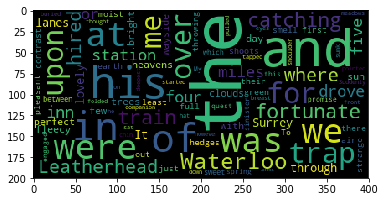

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud(stopwords=[]).generate(string)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)